#Brain Tumor Detection using CNN
This project uses a convolutional Neural Network(CNN) to classify brain MRI scans into:
-Glioma Tumor
-Meningioma Tumor
-Pituitary Tumor
-No Tumor

In [1]:
#=======================================
#Import Libraries & Mount Drive
#=======================================
#Google Drive Access
from google.colab import drive
drive.mount('/content/drive')
#Basic Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
print("Project folder reeady at: /content/drive/MyDrive/Brain_Tumor_Project")

Mounted at /content/drive
Project folder reeady at: /content/drive/MyDrive/Brain_Tumor_Project


In [8]:
#===========================
#Import Required Libraries
#===========================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#================================
#Download Dataset from kaggle
#===============================
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nasimashaik11","key":"93edfc51599b8644ffb77884c1a835c8"}'}

In [ ]:
#============================
#Extract & Organize Dataset
#============================
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset -p /content/drive/MyDrive/Brain_Tumor_Project
!unzip /content/drive/MyDrive/Brain_Tumor_Project/brain-tumor-mri-dataset.zip -d /content/drive/MyDrive/Brain_Tumor_Project/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/drive/MyDrive/Brain_Tumor_Project/dataset/Training/gli

In [3]:
#===========================
#Extracted Dataset Location
#===========================
import os
print(os.listdir("/content"))

['.config', 'drive', 'sample_data']


In [ ]:
#==============================
#Explore Dataset folders
#==============================
import os
print(os.listdir("/content/drive/MyDrive/Brain_Tumor_Project/dataset"))

['Testing', 'Training']


In [2]:
#==================================
#Class folders in Training Dataset
#==================================
import os
train_dir='/content/drive/MyDrive/Brain_Tumor_Project/dataset/Training'
print(os.listdir(train_dir))

['glioma', 'meningioma', 'notumor', 'pituitary']


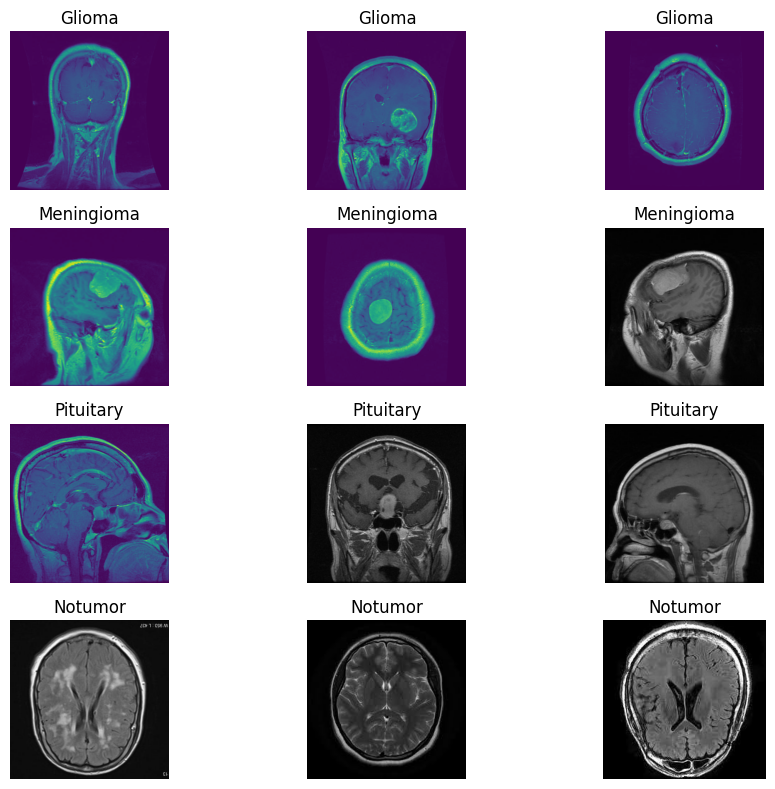

In [ ]:
#=========================================
#Visualize Sample Images From Each Class
#=========================================
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
train_dir="/content/drive/MyDrive/Brain_Tumor_Project/dataset/Training"
classes=['glioma','meningioma','pituitary','notumor']
plt.figure(figsize=(10,8))
for i,cls in enumerate(classes):
  cls_path=os.path.join(train_dir,cls)
  img_list=os.listdir(cls_path)
  images=random.sample(img_list,min(3,len(img_list)))
  for j,img_name in enumerate(images):
    img_path=os.path.join(cls_path,img_name)
    img=mpimg.imread(img_path)
    plt.subplot(len(classes),3,i*3+j+1)
    plt.imshow(img)
    plt.title(cls.replace("_","").title())
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import os
from google.colab import drive

# Mount Google Drive if not already mounted
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

project_path="/content/drive/MyDrive/Brain_Tumor_Project"

# Check if the directory exists before listing
if os.path.exists(project_path):
    print(f"Contents of {project_path}:")
    print(os.listdir(project_path))
else:
    print(f"Error: The directory {project_path} was not found after mounting Google Drive.")

Mounted at /content/drive
Google Drive mounted successfully.
Contents of /content/drive/MyDrive/Brain_Tumor_Project:
['brain-tumor-mri-dataset.zip', 'kaggle.json', 'kaggle (1).json', 'dataset']


In [9]:
#====================
#data loading
#====================
train_dir="/content/drive/MyDrive/Brain_Tumor_Project/dataset/Training"
test_dir="/content/drive/MyDrive/Brain_Tumor_Project/dataset/Testing"
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
test_data=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
#==================================
#total count of tumor and no tumor
#==================================
import os
dataset_path="/content/drive/MyDrive/Brain_Tumor_Project/dataset"
#=================================
#training folder
#=================================
train_path=os.path.join(dataset_path,"Training")
train_classes=os.listdir(train_path)
print("Training Classes:",train_classes)
for cls in train_classes:
  cls_path=os.path.join(train_path,cls)
  print(f"Number of images in {cls} class:",len(os.listdir(cls_path)))
#====================================
#testing folder
#====================================
test_path=os.path.join(dataset_path,"Testing")
test_classes=os.listdir(test_path)
print("Testing Classes:",test_classes)
for cls in test_classes:
  cls_path=os.path.join(test_path,cls)
  print(f"Number of images in {cls} class:",len(os.listdir(cls_path)))

Training Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of images in glioma class: 1321
Number of images in meningioma class: 1339
Number of images in notumor class: 1595
Number of images in pituitary class: 1457
Testing Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of images in glioma class: 300
Number of images in meningioma class: 306
Number of images in notumor class: 405
Number of images in pituitary class: 300


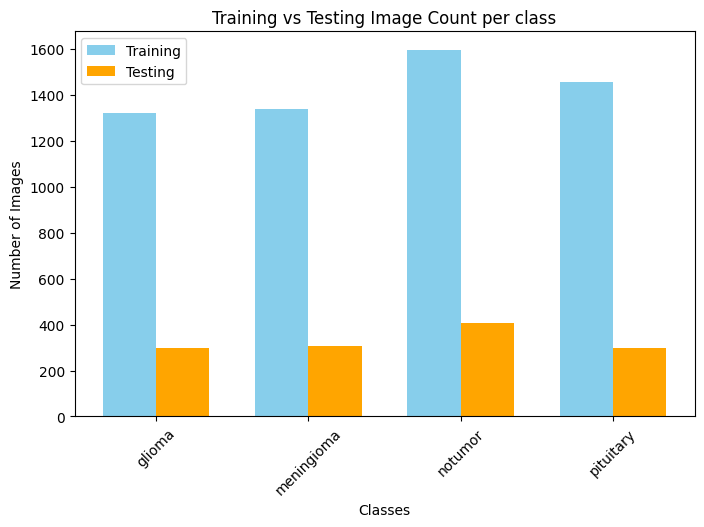

In [5]:
#==========================================
#Training vs Testing Image Count Per Class
#==========================================
import matplotlib.pyplot as plt
import numpy as np
import os
dataset_path="/content/drive/MyDrive/Brain_Tumor_Project/dataset"
train_path=os.path.join(dataset_path,"Training")
test_path=os.path.join(dataset_path,"Testing")
classes=os.listdir(train_path)
train_counts=[len(os.listdir(os.path.join(train_path,c)))for c in classes]
test_counts=[len(os.listdir(os.path.join(test_path,c)))for c in classes]
x=np.arange(len(classes))
width=0.35
plt.figure(figsize=(8,5))
plt.bar(x-width/2,train_counts,width,label='Training',color='skyblue')
plt.bar(x+width/2,test_counts,width,label='Testing',color='orange')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title("Training vs Testing Image Count per class")
plt.xticks(x,classes,rotation=45)
plt.legend()
plt.show()


In [4]:
#================================
#to check chart is saved or not
#================================
import os
file_path="/content/drive/MyDrive/Brain_Tumor_Project/training_testing_chart.png"
if os.path.exists(file_path):
  print("Chart saved successfully")
else:
  print("Chart not saved")

Chart saved successfully


In [ ]:
#===========================
#CNN model Architecture
#===========================
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.5743 - loss: 0.9813 - val_accuracy: 0.7628 - val_loss: 0.6635
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8378 - loss: 0.4195 - val_accuracy: 0.8299 - val_loss: 0.4382
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8895 - loss: 0.2973 - val_accuracy: 0.8291 - val_loss: 0.4172
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.9136 - loss: 0.2387 - val_accuracy: 0.8574 - val_loss: 0.4313
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9225 - loss: 0.1882 - val_accuracy: 0.8741 - val_loss: 0.4530


model saved succesfully


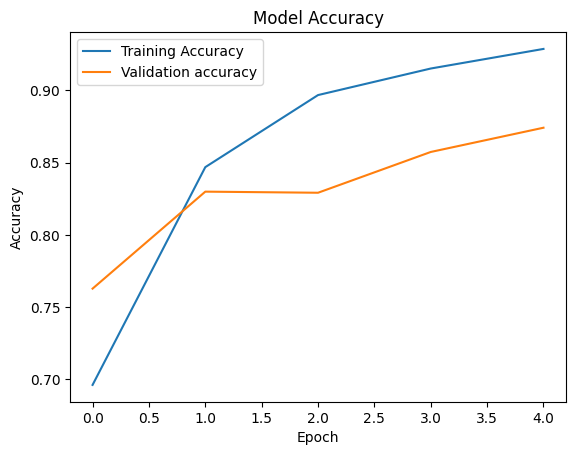

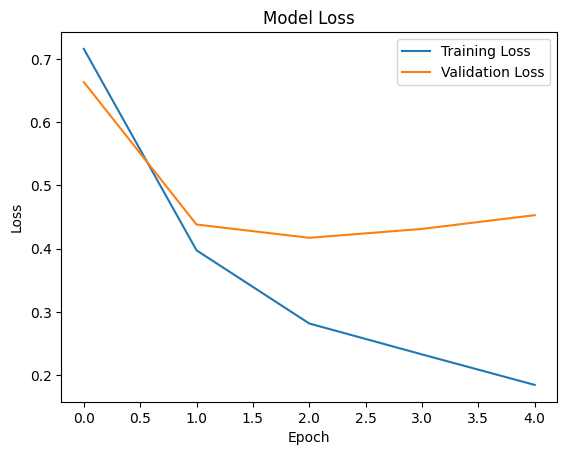

In [ ]:
#================================================
#Train CNN model epochs & Visualize Accuracy/Loss
#================================================
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_data,epochs=5,validation_data=test_data)
model.save("/content/drive/MyDrive/Brain_Tumor_Project/model.h5")
print("model saved succesfully")
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

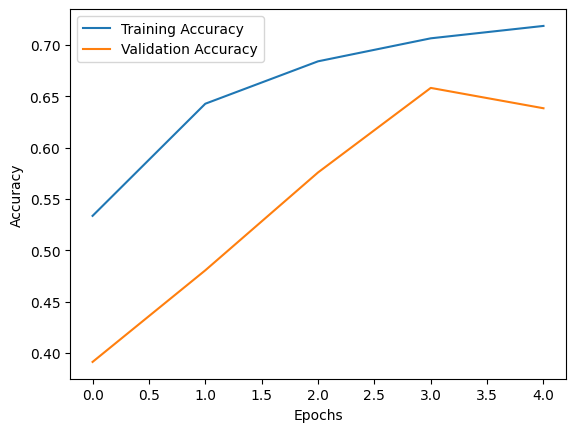

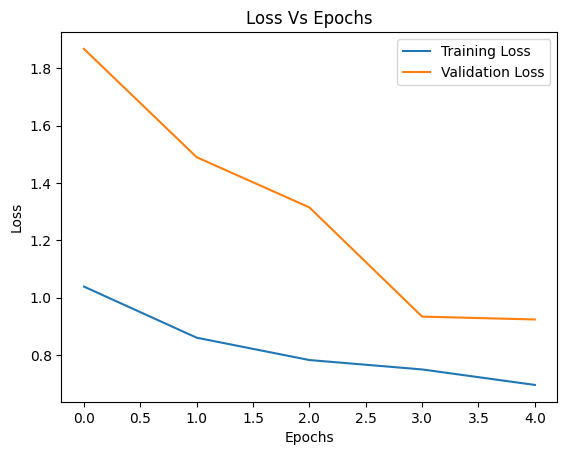

In [ ]:
#==========================
#plot accuracy&loss graph
#==========================
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Vs Epochs')
plt.show()

accuracy graph saved successfully


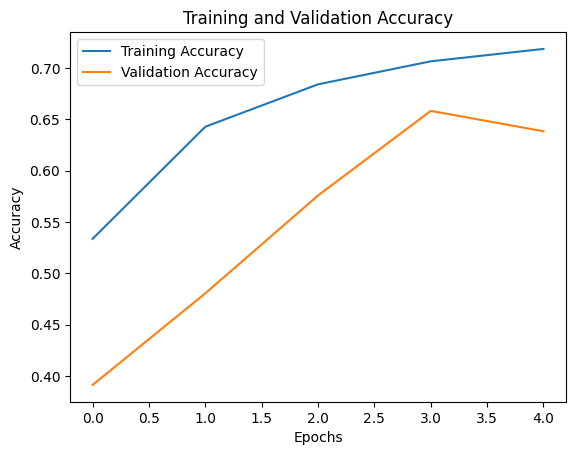

In [ ]:
#======================
#saving accuracy graph
#=======================
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig("/content/drive/MyDrive/Brain_Tumor_Project/accuracy_graph.png")
print("accuracy graph saved successfully")

loss graph saved successfully


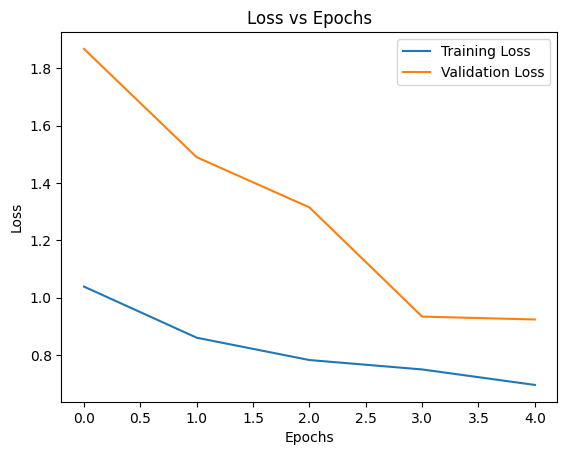

In [ ]:
#==================
#saving loss graph
#==================
plt.figure()
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.savefig("/content/drive/MyDrive/Brain_Tumor_Project/loss_graph.png")
print("loss graph saved successfully")

In [ ]:
#===========================
#Evaluate Model on Testdata
#===========================
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
val_loss,val_acc=model.evaluate(val_data)
print(f"Validation Accuracy:{val_acc*100:.4f}%")
print(f"Validation Loss:{val_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6890 - loss: 0.8459
Validation Accuracy:66.7835%
Validation Loss:0.8854


In [12]:
#====================
#Save Trained Model
#====================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

# Define the model architecture again
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now save the model
model.save("/content/drive/MyDrive/Brain_Tumor_Project/model.h5")
print("model saved successfully")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model saved successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


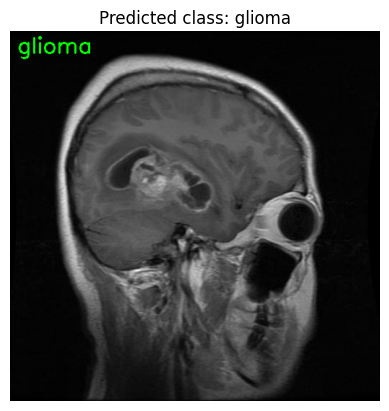

Predicted class:/content/Testing/predicted_Te-gl_0282.jpg


In [ ]:
#======================================
#Sigle Image Prediction
#======================================
import cv2
import random
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image
test_dir="/content/Testing"
class_folder=random.choice(os.listdir(test_dir))
class_path=os.path.join(test_dir,class_folder)
img_file=random.choice(os.listdir(class_path))
img_path=os.path.join(class_path,img_file)
img=image.load_img(img_path,target_size=(150,150))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)/255.0
prediction=model.predict(img_array)
pred_class=np.argmax(prediction)
class_label=['glioma','meningioma','pituitary','notumor']
pred_label=class_label[pred_class]
orig_img=cv2.imread(img_path)
# Ensure the image is not None before processing
if orig_img is not None:
    cv2.putText(orig_img,pred_label,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    save_path=os.path.join(test_dir,f"predicted_{img_file}")
    cv2.imwrite(save_path,orig_img)
    plt.imshow(cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted class: {pred_label}")
    plt.axis("off")
    plt.show()
    print(f"Predicted class:{save_path}")
else:
    print(f"Error loading image: {img_path}")

In [13]:
#==========================================
#Check Files & Folders in Project Directory
#==========================================
!ls "/content/drive/MyDrive/Brain_Tumor_Project"

 accuracy_graph.png	      'kaggle (1).json'   model.h5
 brain-tumor-mri-dataset.zip   kaggle.json	  training_testing_chart.png
 dataset		       loss_graph.png
